## 1. Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Libraries loaded!")

✅ Libraries loaded!


In [2]:
# Load dataset - takes ~30 seconds due to size
print("Loading 2M+ rows... please wait")

df = pd.read_csv('../datasets/household_power_consumption.txt', 
                 sep=';',
                 low_memory=False,
                 na_values=['?'],
                 parse_dates={'datetime': ['Date', 'Time']},
                 infer_datetime_format=True)

print(f"\n✅ Dataset loaded!")
print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\n📋 Columns:")
print(df.dtypes)

Loading 2M+ rows... please wait

✅ Dataset loaded!
📊 Shape: 2,075,259 rows × 8 columns

📋 Columns:
datetime                 datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

✅ Dataset loaded!
📊 Shape: 2,075,259 rows × 8 columns

📋 Columns:
datetime                 datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object


## 2. Initial Exploration

In [3]:
# First few rows
print("First 10 rows:")
df.head(10)

First 10 rows:


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,2006-12-16 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


In [4]:
# Basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [5]:
# Check missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage': missing_pct
}).sort_values('Percentage', ascending=False)

print("\n❓ Missing Values:")
print(missing_df[missing_df['Missing'] > 0])
print(f"\nTotal missing: {missing.sum():,} ({(missing.sum() / (len(df) * len(df.columns))) * 100:.2f}% of all data)")


❓ Missing Values:
                       Missing  Percentage
Global_active_power      25979    1.251844
Global_reactive_power    25979    1.251844
Voltage                  25979    1.251844
Global_intensity         25979    1.251844
Sub_metering_1           25979    1.251844
Sub_metering_2           25979    1.251844
Sub_metering_3           25979    1.251844

Total missing: 181,853 (1.10% of all data)


In [6]:
# Convert columns to numeric
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("✅ Columns converted to numeric")

✅ Columns converted to numeric


In [7]:
# Statistical summary
print("📈 Statistical Summary:")
df[numeric_cols].describe().round(3)

📈 Statistical Summary:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280.000,2049280.000,2049280.00,2049280.000,2049280.000,2049280.000,2049280.000
mean,1.092,0.124,240.84,4.628,1.122,1.299,6.458
std,1.057,0.113,3.24,4.444,6.153,5.822,8.437
min,0.076,0.000,223.20,0.200,0.000,0.000,0.000
25%,0.308,0.048,238.99,1.400,0.000,0.000,0.000
50%,0.602,0.100,241.01,2.600,0.000,0.000,1.000
75%,1.528,0.194,242.89,6.400,0.000,1.000,17.000
max,11.122,1.390,254.15,48.400,88.000,80.000,31.000


## 3. Time Period Analysis

In [8]:
# Time range
print(f"📅 Date range:")
print(f"   Start: {df['datetime'].min()}")
print(f"   End: {df['datetime'].max()}")
print(f"   Duration: {(df['datetime'].max() - df['datetime'].min()).days} days ({(df['datetime'].max() - df['datetime'].min()).days / 365:.1f} years)")

📅 Date range:
   Start: 2006-12-16 17:24:00
   End: 2010-11-26 21:02:00
   Duration: 1441 days (3.9 years)


## 4. Distribution Analysis

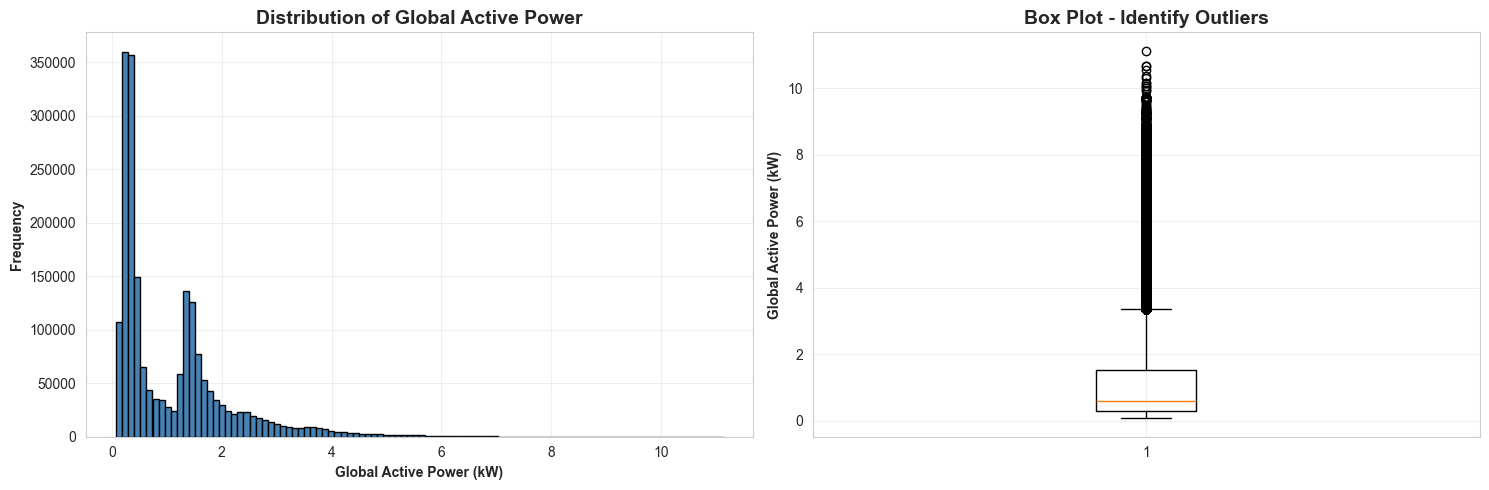

Mean power: 1.092 kW
Median power: 0.602 kW
Std dev: 1.057 kW


In [9]:
# Distribution of Global Active Power (our main target)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['Global_active_power'].dropna(), bins=100, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Global Active Power (kW)', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Distribution of Global Active Power', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['Global_active_power'].dropna(), vert=True)
axes[1].set_ylabel('Global Active Power (kW)', fontweight='bold')
axes[1].set_title('Box Plot - Identify Outliers', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean power: {df['Global_active_power'].mean():.3f} kW")
print(f"Median power: {df['Global_active_power'].median():.3f} kW")
print(f"Std dev: {df['Global_active_power'].std():.3f} kW")

## 5. Sub-metering Analysis

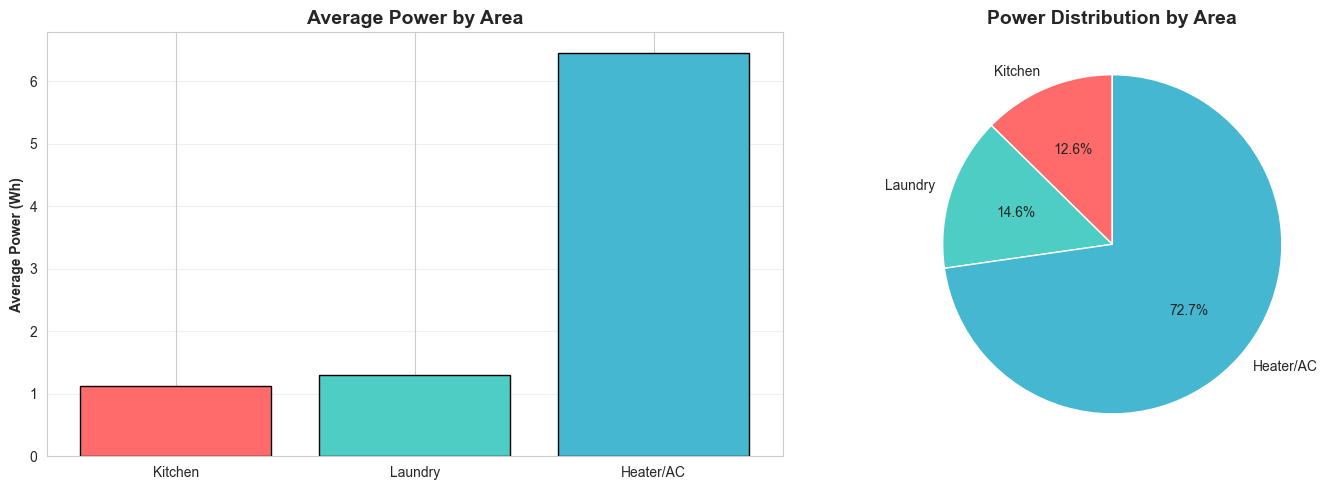

Kitchen: 1.12 Wh
Laundry: 1.30 Wh
Heater/AC: 6.46 Wh


In [10]:
# Compare sub-metering zones
submeter_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
submeter_names = ['Kitchen', 'Laundry', 'Heater/AC']

submeter_avg = [df[col].mean() for col in submeter_cols]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
axes[0].bar(submeter_names, submeter_avg, color=['#ff6b6b', '#4ecdc4', '#45b7d1'], edgecolor='black')
axes[0].set_ylabel('Average Power (Wh)', fontweight='bold')
axes[0].set_title('Average Power by Area', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(submeter_avg, labels=submeter_names, autopct='%1.1f%%', 
            colors=['#ff6b6b', '#4ecdc4', '#45b7d1'], startangle=90)
axes[1].set_title('Power Distribution by Area', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

for name, avg in zip(submeter_names, submeter_avg):
    print(f"{name}: {avg:.2f} Wh")

## 6. Correlation Analysis

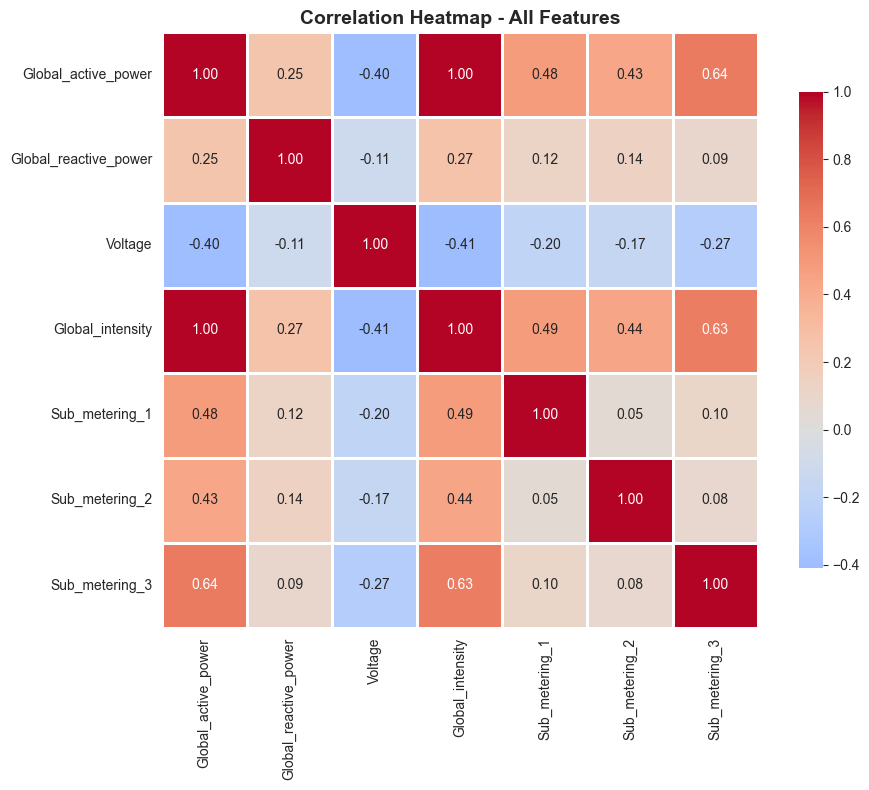


Top correlations with Global_active_power:
Global_active_power      1.000000
Global_intensity         0.998889
Sub_metering_3           0.638555
Sub_metering_1           0.484401
Sub_metering_2           0.434569
Global_reactive_power    0.247017
Voltage                 -0.399762
Name: Global_active_power, dtype: float64


In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - All Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTop correlations with Global_active_power:")
corr_with_target = correlation['Global_active_power'].sort_values(ascending=False)
print(corr_with_target)

## 7. Temporal Patterns - Sample Data

Due to dataset size, we'll analyze a sample for visualization

Sample size: 10,081 rows (one week)


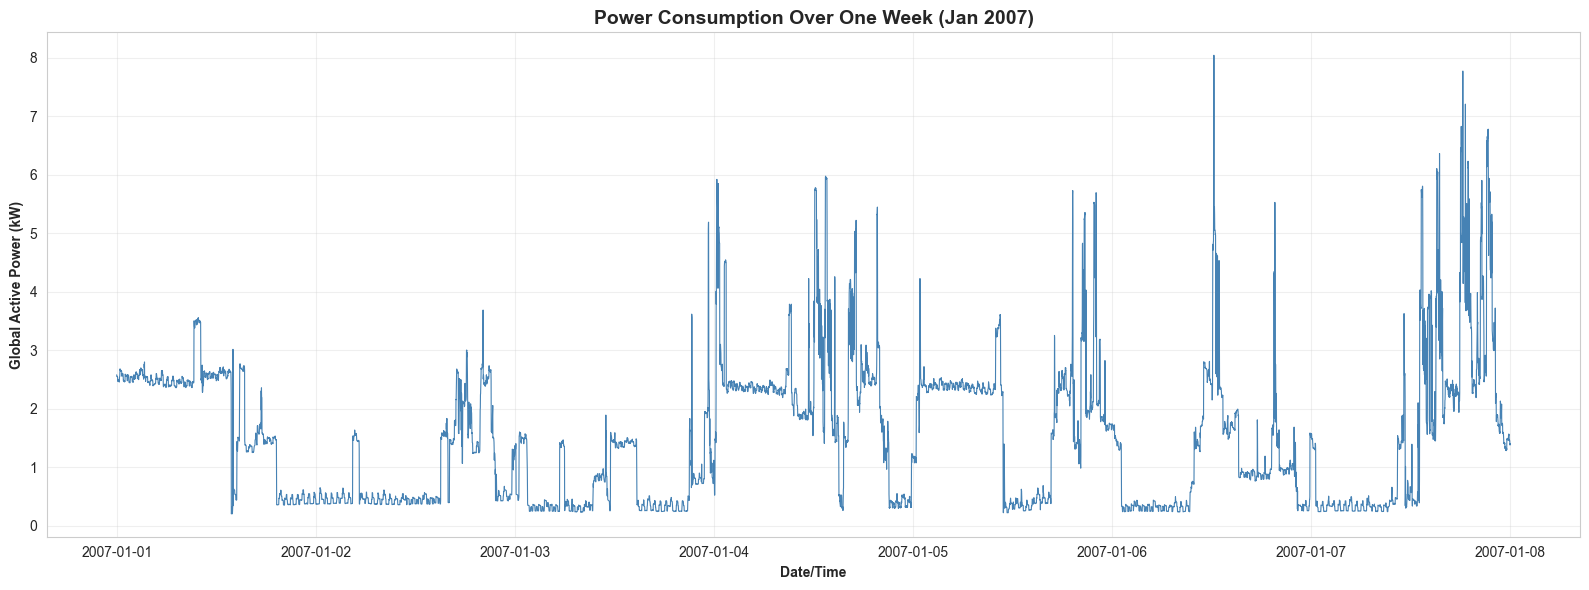

In [12]:
# Sample one week for detailed analysis
df_sample = df[df['datetime'].between('2007-01-01', '2007-01-08')].copy()

print(f"Sample size: {len(df_sample):,} rows (one week)")

# Plot
plt.figure(figsize=(16, 6))
plt.plot(df_sample['datetime'], df_sample['Global_active_power'], linewidth=0.8, color='steelblue')
plt.xlabel('Date/Time', fontweight='bold')
plt.ylabel('Global Active Power (kW)', fontweight='bold')
plt.title('Power Consumption Over One Week (Jan 2007)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Key Insights

In [13]:
print("=" * 70)
print("KEY INSIGHTS FROM EDA")
print("=" * 70)

print("\n📊 Dataset:")
print(f"   • {len(df):,} observations over {(df['datetime'].max() - df['datetime'].min()).days / 365:.1f} years")
print(f"   • Missing data: ~{(df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.2f}%")

print("\n⚡ Power Consumption:")
print(f"   • Average: {df['Global_active_power'].mean():.2f} kW")
print(f"   • Range: {df['Global_active_power'].min():.2f} - {df['Global_active_power'].max():.2f} kW")

print("\n🏠 Sub-metering:")
print(f"   • Kitchen uses most power")
print(f"   • Strong correlation between total power and sub-meters")

print("\n🎯 Next Steps:")
print("   1. Handle missing values")
print("   2. Create time-based features (hour, day, month, season)")
print("   3. Sample data for faster model training")
print("   4. Test cluster-then-regress approach")

print("\n✅ EDA Complete!")

KEY INSIGHTS FROM EDA

📊 Dataset:
   • 2,075,259 observations over 3.9 years
   • Missing data: ~1.10%

⚡ Power Consumption:
   • Average: 1.09 kW
   • Range: 0.08 - 11.12 kW

🏠 Sub-metering:
   • Kitchen uses most power
   • Strong correlation between total power and sub-meters

🎯 Next Steps:
   1. Handle missing values
   2. Create time-based features (hour, day, month, season)
   3. Sample data for faster model training
   4. Test cluster-then-regress approach

✅ EDA Complete!
